In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# Загрузка данных
df = pd.read_csv('cs-training.csv')


## 🧹 Предобработка и очистка данных по результатам EDA-инсайтов

In [5]:
print("Первичный просмотр данных:")
print(df.head())

Первичный просмотр данных:
   Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines   age  \
0           1               1.0                              0.766127  45.0   
1           2               0.0                              0.957151  40.0   
2           3               0.0                              0.658180  38.0   
3           4               0.0                              0.233810  30.0   
4           5               0.0                              0.907239  49.0   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                   2.0   0.802982         9120.0   
1                                   0.0   0.121876         2600.0   
2                                   1.0   0.085113         3042.0   
3                                   0.0   0.036050         3300.0   
4                                   1.0   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                   

In [6]:
print("Размерность набора данных (строки, столбцы):")
print(df.shape)

Размерность набора данных (строки, столбцы):
(104619, 12)


In [7]:
print("Названия столбцов:")
print(df.columns)

Названия столбцов:
Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


In [8]:
print("Типы данных и количество непустых значений:")
print(df.info())

Типы данных и количество непустых значений:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104619 entries, 0 to 104618
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            104619 non-null  int64  
 1   SeriousDlqin2yrs                      104618 non-null  float64
 2   RevolvingUtilizationOfUnsecuredLines  104618 non-null  float64
 3   age                                   104618 non-null  float64
 4   NumberOfTime30-59DaysPastDueNotWorse  104618 non-null  float64
 5   DebtRatio                             104618 non-null  float64
 6   MonthlyIncome                         83920 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       104618 non-null  float64
 8   NumberOfTimes90DaysLate               104618 non-null  float64
 9   NumberRealEstateLoansOrLines          104618 non-null  float64
 10  NumberOfTime60-89DaysPas

In [9]:
print("Количество пропущенных значений по каждому признаку:")
print(df.isna().sum())

Количество пропущенных значений по каждому признаку:
Unnamed: 0                                  0
SeriousDlqin2yrs                            1
RevolvingUtilizationOfUnsecuredLines        1
age                                         1
NumberOfTime30-59DaysPastDueNotWorse        1
DebtRatio                                   1
MonthlyIncome                           20699
NumberOfOpenCreditLinesAndLoans             1
NumberOfTimes90DaysLate                     1
NumberRealEstateLoansOrLines                1
NumberOfTime60-89DaysPastDueNotWorse        1
NumberOfDependents                       2746
dtype: int64


In [10]:
print("Количество дубликатов:")
print(df.duplicated().sum())

Количество дубликатов:
0


In [11]:
print("Количество пустых строк в каждой колонке:")
print(df.eq('').sum())

Количество пустых строк в каждой колонке:
Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


In [12]:
print("Основные статистики по числовым признакам:")
print(df.describe())

Основные статистики по числовым признакам:
          Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count  104619.000000     104618.000000                         104618.000000   
mean    52309.000096          0.066776                              6.022524   
std     30201.048078          0.249635                            257.986153   
min         1.000000          0.000000                              0.000000   
25%     26154.500000          0.000000                              0.030012   
50%     52309.000000          0.000000                              0.156042   
75%     78463.500000          0.000000                              0.562417   
max    104618.000000          1.000000                          50708.000000   

                 age  NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  \
count  104618.000000                         104618.000000  104618.000000   
mean       52.258464                              0.423493     354.855912   
std  

Построение гистограмм для всех числовых признаков:


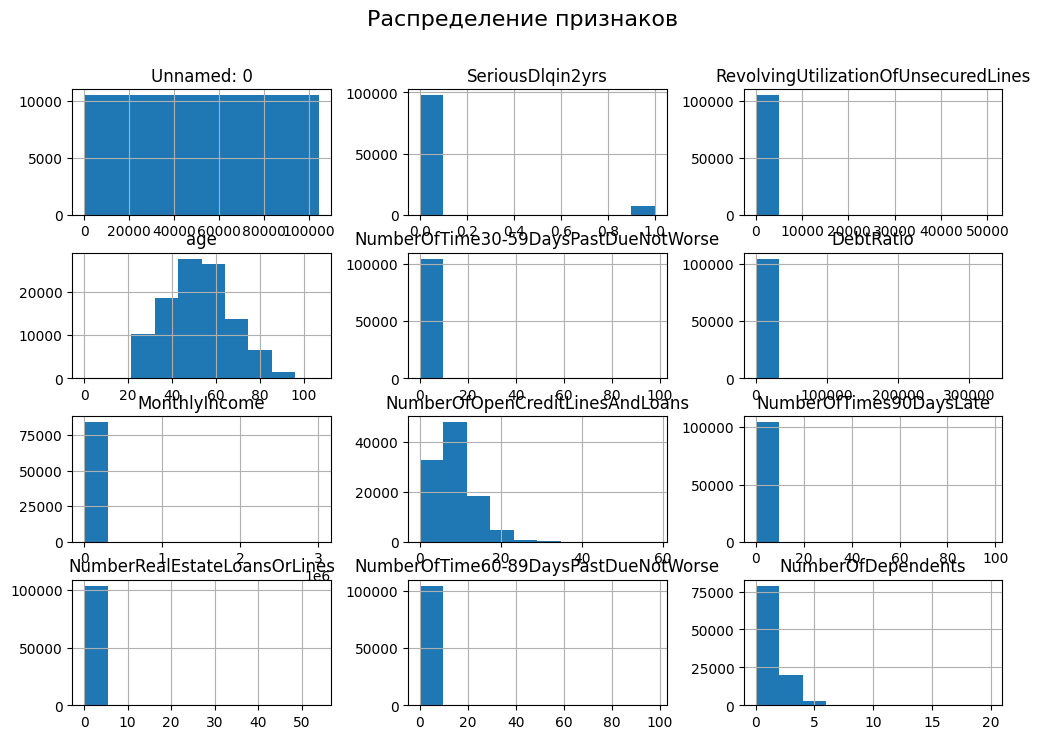

In [13]:
print("Построение гистограмм для всех числовых признаков:")
df.hist(figsize=(12, 8))
plt.suptitle("Распределение признаков", fontsize=16)
plt.show()

In [15]:
print("Процент пропущенных значений в каждом столбце:")
print(df.isna().mean() * 100)

print("Заполнение пропусков медианой:")
df.fillna(df.median(), inplace=True)

Процент пропущенных значений в каждом столбце:
Unnamed: 0                               0.000000
SeriousDlqin2yrs                         0.000956
RevolvingUtilizationOfUnsecuredLines     0.000956
age                                      0.000956
NumberOfTime30-59DaysPastDueNotWorse     0.000956
DebtRatio                                0.000956
MonthlyIncome                           19.785125
NumberOfOpenCreditLinesAndLoans          0.000956
NumberOfTimes90DaysLate                  0.000956
NumberRealEstateLoansOrLines             0.000956
NumberOfTime60-89DaysPastDueNotWorse     0.000956
NumberOfDependents                       2.624762
dtype: float64
Заполнение пропусков медианой:


In [16]:
print("Частота значений категориальных признаков:")
categorical_columns = df.select_dtypes(include='O').columns
if not categorical_columns.empty:
    for col in categorical_columns:
        print(f"\n{col} value counts:")
        print(df[col].value_counts())
else:
    print("Нет категориальных признаков.")

Частота значений категориальных признаков:
Нет категориальных признаков.


Boxplot для поиска выбросов:


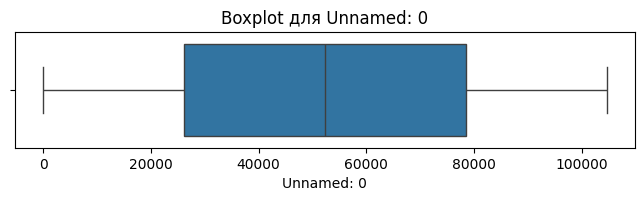

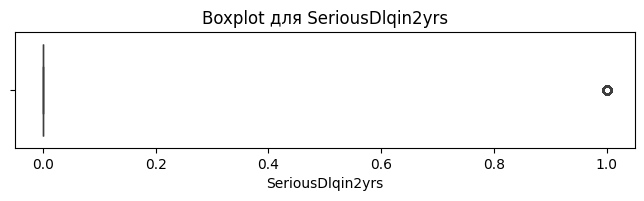

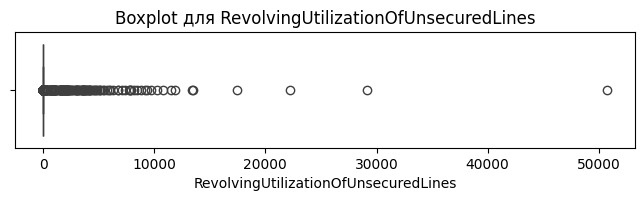

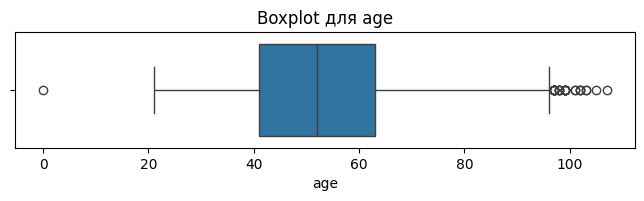

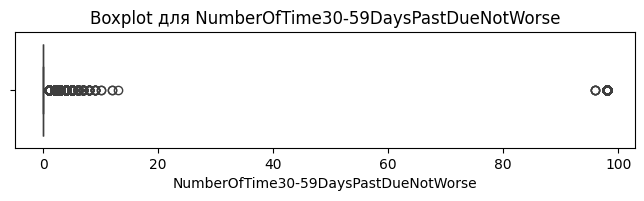

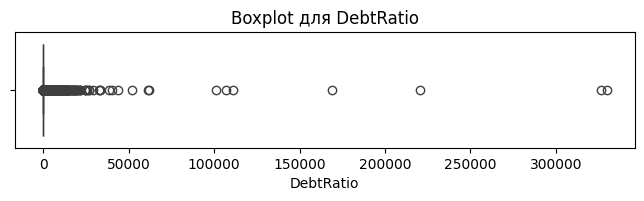

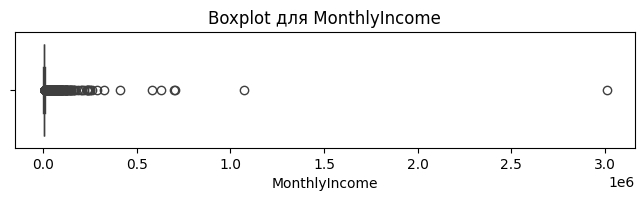

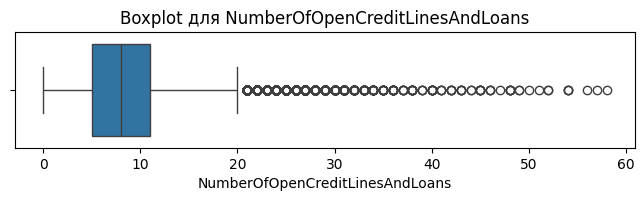

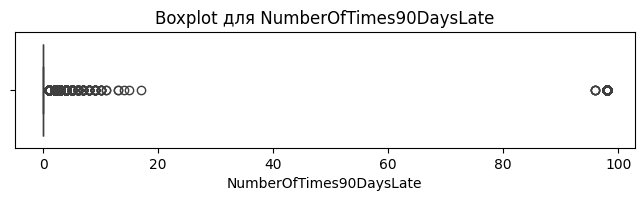

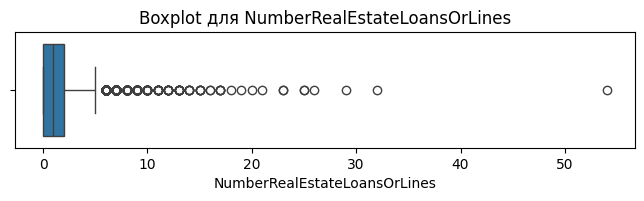

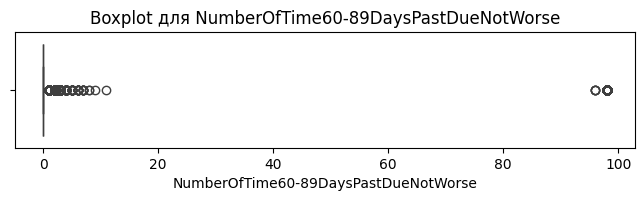

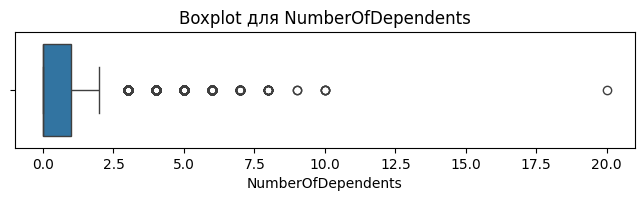

In [17]:
print("Boxplot для поиска выбросов:")
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot для {col}')
    plt.show()


In [18]:
print("Заполнение пропущенных значений в MonthlyIncome медианой")
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())

Заполнение пропущенных значений в MonthlyIncome медианой


In [19]:
print("Удаляем строки с NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse и NumberOfTime30-59DaysPastDueNotWorse = 96 или 98")

mask_anomaly = (
    (df['NumberOfTimes90DaysLate'] >= 96) &
    (df['NumberOfTimes90DaysLate'] == df['NumberOfTime60-89DaysPastDueNotWorse']) &
    (df['NumberOfTimes90DaysLate'] == df['NumberOfTime30-59DaysPastDueNotWorse'])
)
print(f"Удалено аномальных строк: {mask_anomaly.sum()}")
df = df[~mask_anomaly]


Удаляем строки с NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse и NumberOfTime30-59DaysPastDueNotWorse = 96 или 98
Удалено аномальных строк: 191


In [20]:
print("Удаляем строки с RevolvingUtilizationOfUnsecuredLines >= 13 (аномальные значения)")

mask_util = df['RevolvingUtilizationOfUnsecuredLines'] >= 13
print(f"Удалено строк: {mask_util.sum()}")
df = df[~mask_util]


Удаляем строки с RevolvingUtilizationOfUnsecuredLines >= 13 (аномальные значения)
Удалено строк: 163


In [21]:
print("Заполнение пропущенных значений в NumberOfDependents модой")
df['NumberOfDependents'] = df['NumberOfDependents'].fillna(df['NumberOfDependents'].mode()[0])

Заполнение пропущенных значений в NumberOfDependents модой



🔗 Pairplot (взаимосвязи между переменными) — по подвыборке для производительности:


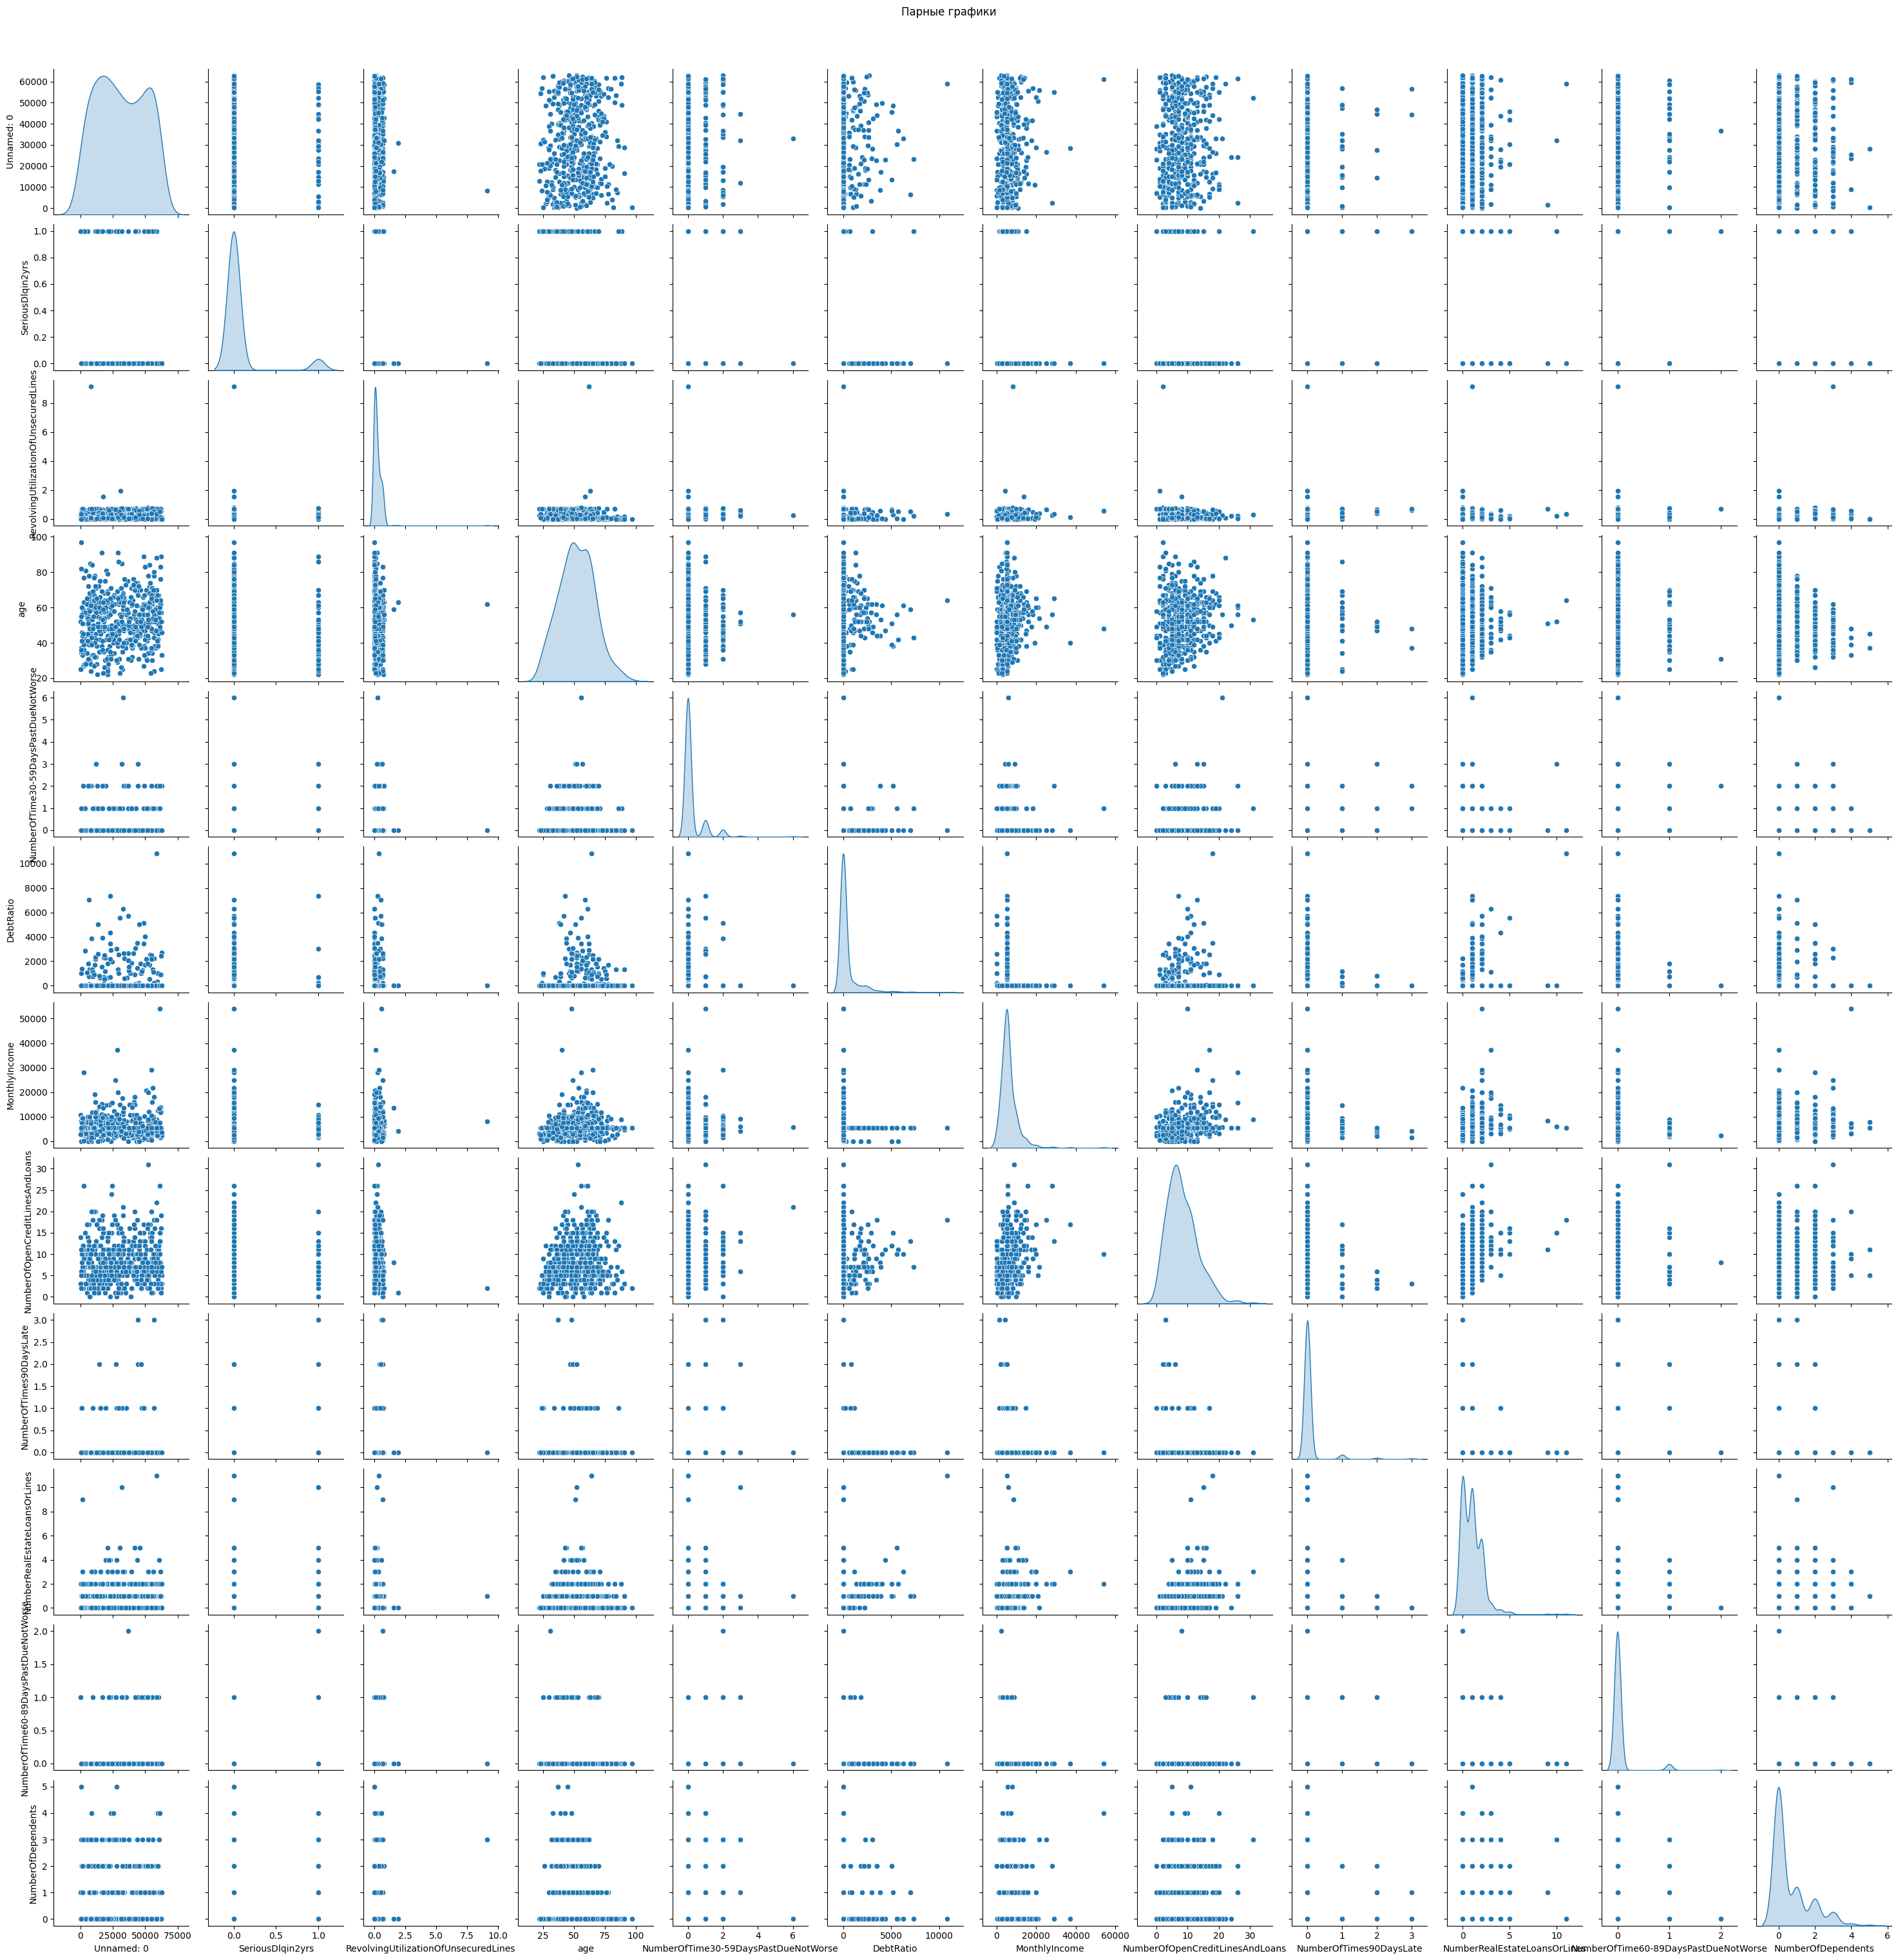

In [ ]:
print("Pairplot (взаимосвязи между переменными) — по подвыборке для производительности:")
sns.pairplot(df.sample(500), diag_kind='kde')
plt.suptitle("Парные графики", y=1.02)
plt.show()

In [22]:
print("Применяем логарифмирование (log1p) к признаку 'RevolvingUtilizationOfUnsecuredLines':")
df['RevolvingUtilizationOfUnsecuredLines'] = np.log1p(df['RevolvingUtilizationOfUnsecuredLines'])

print("Стандартизация признаков:")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('SeriousDlqin2yrs', axis=1))

Применяем логарифмирование (log1p) к признаку 'RevolvingUtilizationOfUnsecuredLines':
Стандартизация признаков:


Корреляции признаков между собой:


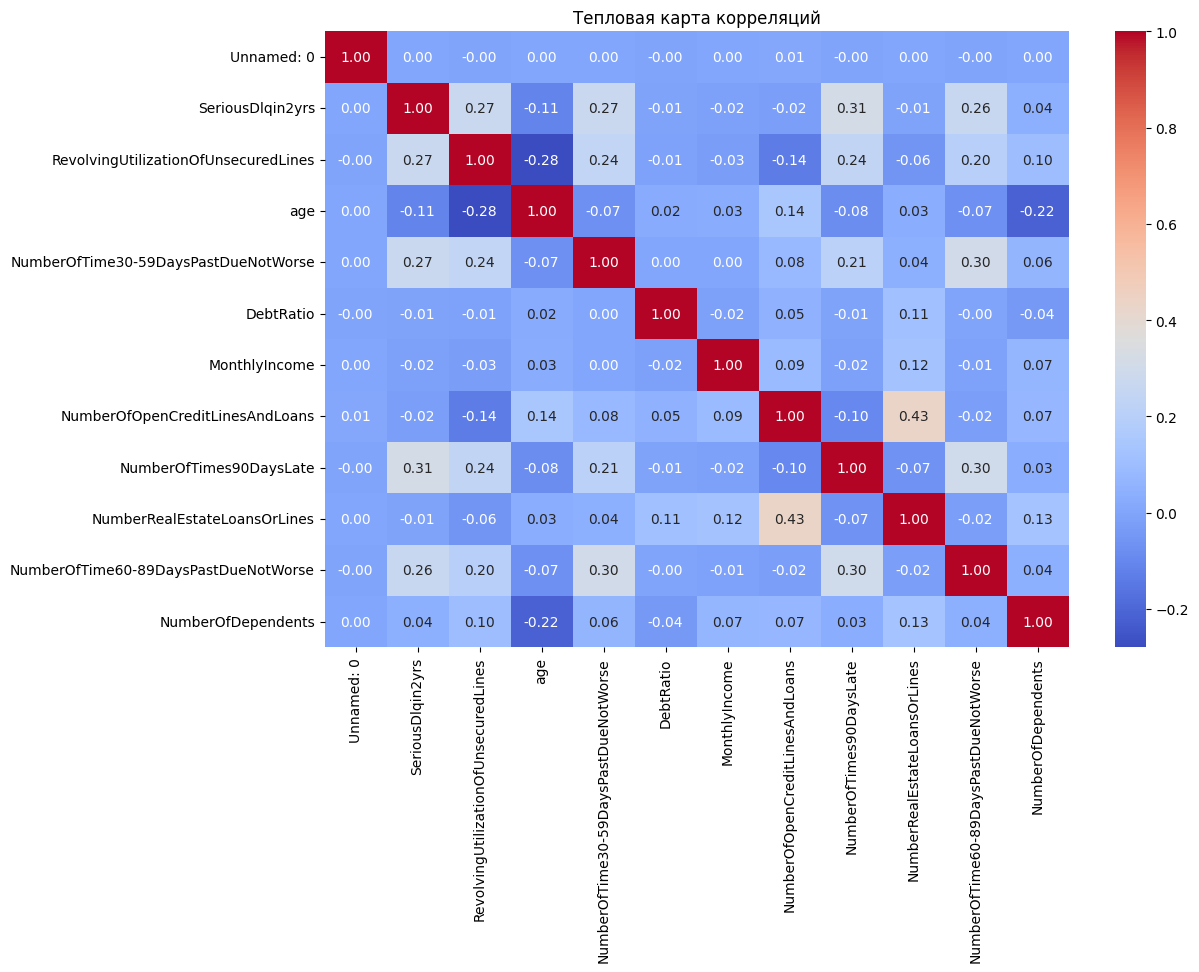

Корреляция признаков с целевой переменной 'SeriousDlqin2yrs':
SeriousDlqin2yrs                        1.000000
NumberOfTimes90DaysLate                 0.311979
RevolvingUtilizationOfUnsecuredLines    0.272927
NumberOfTime30-59DaysPastDueNotWorse    0.272323
NumberOfTime60-89DaysPastDueNotWorse    0.264391
NumberOfDependents                      0.043798
Unnamed: 0                              0.003161
DebtRatio                              -0.005096
NumberRealEstateLoansOrLines           -0.005540
MonthlyIncome                          -0.017024
NumberOfOpenCreditLinesAndLoans        -0.024357
age                                    -0.111953
Name: SeriousDlqin2yrs, dtype: float64


In [23]:
print("Корреляции признаков между собой:")
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Тепловая карта корреляций")
plt.show()

print("Корреляция признаков с целевой переменной 'SeriousDlqin2yrs':")
print(corr_matrix['SeriousDlqin2yrs'].sort_values(ascending=False))

## 🔹 Бейзлайн: Логистическая регрессия

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("🔹 Classification Report для логистической регрессии:")
print(classification_report(y_test, y_pred))
print("🔹 ROC AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))


🔹 Classification Report для логистической регрессии:
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     19490
         1.0       0.56      0.15      0.23      1363

    accuracy                           0.94     20853
   macro avg       0.75      0.57      0.60     20853
weighted avg       0.92      0.94      0.92     20853

🔹 ROC AUC: 0.8484620854534579


## 🌳 Модели: Деревья, Случайный лес, KNN, Градиентный бустинг

In [25]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import roc_auc_score

# Инициализация моделей
models = {
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}

# Определим параметры для поиска для каждой модели
param_grids = {
    'DecisionTree': {
        'max_depth': [3, 5, 7, 10, None],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    },
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7, None],
        'min_samples_split': [2, 5, 10],
        'bootstrap': [True, False]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0]
    }
}

# Словарь для хранения лучших моделей
best_models = {}

# Подбор параметров для каждой модели
for name in models.keys():
    print(f"\n=== Подбор параметров для {name} ===")

    # Используем RandomizedSearchCV для более быстрого поиска
    search = RandomizedSearchCV(
        models[name],
        param_distributions=param_grids[name],
        n_iter=10,  # Количество итераций
        cv=5,       # Количество фолдов
        scoring='roc_auc',
        n_jobs=-1,  # Использовать все ядра
        random_state=42
    )

    search.fit(X_train, y_train)

    # Сохраняем лучшую модель
    best_models[name] = search.best_estimator_

    # Выводим результаты
    print(f"Лучшие параметры: {search.best_params_}")
    print(f"Лучший ROC AUC: {search.best_score_:.4f}")

    # Оценка на тестовых данных
    y_pred = best_models[name].predict(X_test)
    roc = roc_auc_score(y_test, best_models[name].predict_proba(X_test)[:,1])
    print(f'Тестовый ROC AUC: {roc:.4f}')




=== Подбор параметров для DecisionTree ===
Лучшие параметры: {'min_samples_split': 10, 'max_depth': 7, 'criterion': 'entropy'}
Лучший ROC AUC: 0.8394
Тестовый ROC AUC: 0.8366

=== Подбор параметров для RandomForest ===


KeyboardInterrupt: 

In [27]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.2 MB/s eta 0:00:00


In [28]:
# обучаем обычный катбуст
from catboost import CatBoostClassifier, CatBoostRegressor, Pool

clf = CatBoostClassifier(thread_count=-1,
                         random_seed=42,
                         )

clf.fit(
    X_train,
    y_train,
    eval_set=(X_test, y_test),
    verbose=200,
    use_best_model=True,
    plot=False,
    early_stopping_rounds=100,
)

Learning rate set to 0.094505
0:	learn: 0.5708442	test: 0.5707450	best: 0.5707450 (0)	total: 81.4ms	remaining: 1m 21s
200:	learn: 0.1665228	test: 0.1769559	best: 0.1767876 (175)	total: 2.73s	remaining: 10.8s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.1767875912
bestIteration = 175

Shrink model to first 176 iterations.


In [31]:
from catboost import CatBoostClassifier, CatBoostRegressor, Pool
from sklearn.model_selection import StratifiedKFold  # k-фолдная валидация для дизбаланса классов

In [33]:
# Подготовка данных
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_splits = 5
clfs = []
scores = []

kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=7575)

for train_index, test_index in kf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

    train_dataset = Pool(data=X_train, label=y_train)
    eval_dataset = Pool(data=X_test, label=y_test)

    clf = CatBoostClassifier(
        depth=4,
        iterations=3500,
        learning_rate=0.06,
        loss_function="Logloss",
        eval_metric="AUC",
        custom_metric=["Accuracy", "AUC"],
        colsample_bylevel=0.098,
        subsample=0.95,
        l2_leaf_reg=9,
        min_data_in_leaf=243,
        max_bin=187,
        random_strength=1,
        task_type="CPU",
        thread_count=-1,
        bootstrap_type="Bernoulli",
        random_seed=7575,
        auto_class_weights="SqrtBalanced",
        early_stopping_rounds=50
    )

    clf.fit(
        train_dataset,
        eval_set=eval_dataset,
        verbose=500,
        use_best_model=True
    )

    clfs.append(clf)
    scores.append(clf.best_score_['validation']['AUC'])

assert len(clfs) == n_splits
print(f"mean AUC score: {np.mean(scores):.4f} ± {np.std(scores):.4f}")


0:	test: 0.5872856	best: 0.5872856 (0)	total: 11ms	remaining: 38.5s
500:	test: 0.8614595	best: 0.8614595 (499)	total: 5.04s	remaining: 30.2s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8623446811
bestIteration = 866

Shrink model to first 867 iterations.
0:	test: 0.5807932	best: 0.5807932 (0)	total: 10.7ms	remaining: 37.4s
500:	test: 0.8611773	best: 0.8612202 (488)	total: 4.92s	remaining: 29.5s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8615176957
bestIteration = 628

Shrink model to first 629 iterations.
0:	test: 0.5905718	best: 0.5905718 (0)	total: 13.9ms	remaining: 48.6s
500:	test: 0.8617359	best: 0.8617673 (480)	total: 5.78s	remaining: 34.6s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8624855455
bestIteration = 739

Shrink model to first 740 iterations.
0:	test: 0.5801034	best: 0.5801034 (0)	total: 12.9ms	remaining: 45s
500:	test: 0.8588111	best: 0.8588243 (497)	total: 5.99s	remaining: 35.9s
Stopped by overfit

## 🚀 Бустинги: XGBoost, CatBoost, LightGBM

In [35]:
from xgboost import XGBClassifier

best_model_xgb = XGBClassifier(
    subsample=0.6,
    reg_lambda=0,
    reg_alpha=0,
    n_estimators=550,
    min_child_weight=6,
    max_depth=8,
    learning_rate=0.007,
    gamma=0.4,
    colsample_bytree=0.6,
    booster='gbtree',
    random_state=0,
    use_label_encoder=False,
    eval_metric='logloss'
)
best_catboost_model = clfs[np.argmax(scores)]
print(f"Лучшая модель на фолде {np.argmax(scores)} с AUC = {scores[np.argmax(scores)]:.4f}")

Лучшая модель на фолде 4 с AUC = 0.8666


In [36]:
!pip install tqdm

## 🧠 Ансамблевые методы: стекинг, бэггинг


In [37]:
from tqdm import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Инициализация прогресс-бара
steps = ["DecisionTree", "RandomForest", "KNN", "GradientBoosting", "XGBoost", "CatBoost",
         "VotingClassifier", "BaggingClassifier", "StackingClassifier"]
progress = tqdm(steps, desc="Обучение моделей", ncols=100)

# Базовые модели
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_split=10, random_state=42)

rf_model = RandomForestClassifier(n_estimators=200, max_depth=7, min_samples_split=10, bootstrap=False, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=10, weights='distance', p=2)

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, subsample=0.9, random_state=42)

dt_model.fit(X_train, y_train)
progress.update(1)

rf_model.fit(X_train, y_train)
progress.update(1)

knn_model.fit(X_train, y_train)
progress.update(1)

gb_model.fit(X_train, y_train)
progress.update(1)

xgb_model = best_model_xgb.fit(X_train, y_train)
progress.update(1)

cat_model = best_catboost_model


# === Бэггинг ===
bagging_model = BaggingClassifier(

    estimator=dt_model,
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)
bagging_model.fit(X_train, y_train)
progress.update(1)

y_pred_bagging = bagging_model.predict_proba(X_test)[:, 1]
roc_auc_bagging = roc_auc_score(y_test, y_pred_bagging)
print(f'ROC AUC (бэггинг): {roc_auc_bagging:.4f}')

# === Стэкинг ===
base_estimators = [
    ('DecisionTree', dt_model),
    ('RandomForest', rf_model),
    ('KNN', knn_model),
    ('GradientBoosting', gb_model),
    ('XGBoost', xgb_model),
]

stacking_model = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1,
    passthrough=True
)
stacking_model.fit(X_train, y_train)
progress.update(1)

y_pred_stacking = stacking_model.predict_proba(X_test)[:, 1]
roc_auc_stacking = roc_auc_score(y_test, y_pred_stacking)
print(f'\nROC AUC (стэкинг): {roc_auc_stacking:.4f}')

progress.close()


Обучение моделей:  44%|████████████████████▉                          | 4/9 [00:43<00:56, 11.31s/it]/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:56:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
Обучение моделей:  67%|███████████████████████████████▎               | 6/9 [00:56<00:27,  9.07s/it]

ROC AUC (бэггинг): 0.8557


Обучение моделей:  78%|████████████████████████████████████▌          | 7/9 [03:46<01:04, 32.30s/it]


ROC AUC (стэкинг): 0.8557


## 📊 Сравнение моделей по ROC AUC

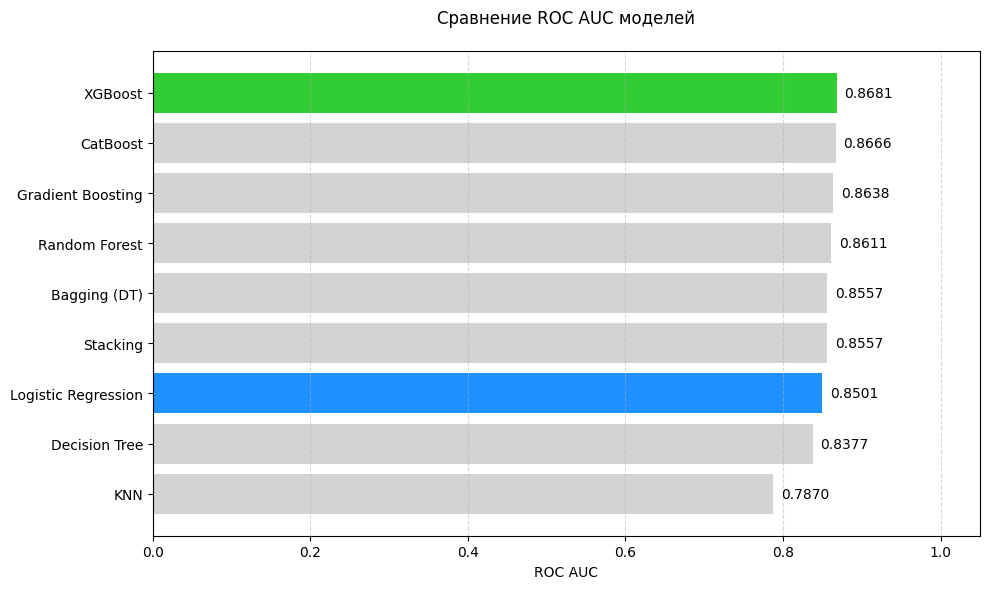

In [38]:
# Считаем ROC AUC для каждой модели
all_models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'KNN': knn_model,
    'Gradient Boosting': gb_model,
    'XGBoost': xgb_model,
    'CatBoost': cat_model,
    'Logistic Regression': lr,
    'Bagging (DT)': bagging_model,
    'Stacking': stacking_model
}

# Считаем ROC AUC для каждой модели
results = {}
for name, model in all_models.items():
    try:
        y_score = model.predict_proba(X_test)[:, 1]
        results[name] = roc_auc_score(y_test, y_score)
    except Exception as e:
        print(f"⚠️ Модель {name} не поддерживает predict_proba или произошла ошибка: {e}")

# Создаем DataFrame и сортируем
results_df = pd.Series(results).sort_values(ascending=True)

# Определяем лучшую модель и базовую (Logistic Regression)
best_model_name = results_df.idxmax()
best_model_score = results_df.max()
base_model_name = 'Logistic Regression'  # Название базовой модели

# Цвета: базовая модель - синий, лучшая - зеленая, остальные - серые
colors = []
for name in results_df.index:
    if name == best_model_name:
        colors.append('limegreen')  # Лучшая модель
    elif name == base_model_name:
        colors.append('dodgerblue')  # Базовая модель (Logistic Regression)
    else:
        colors.append('lightgray')   # Остальные модели

# Визуализация
plt.figure(figsize=(10, 6))
bars = plt.barh(results_df.index, results_df.values, color=colors)

# Подписи значений
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.4f}',
             ha='left', va='center')

# Оформление
plt.title('Сравнение ROC AUC моделей', pad=20)
plt.xlabel('ROC AUC')
plt.xlim([0, 1.05])
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 📌 Анализ лучших моделей

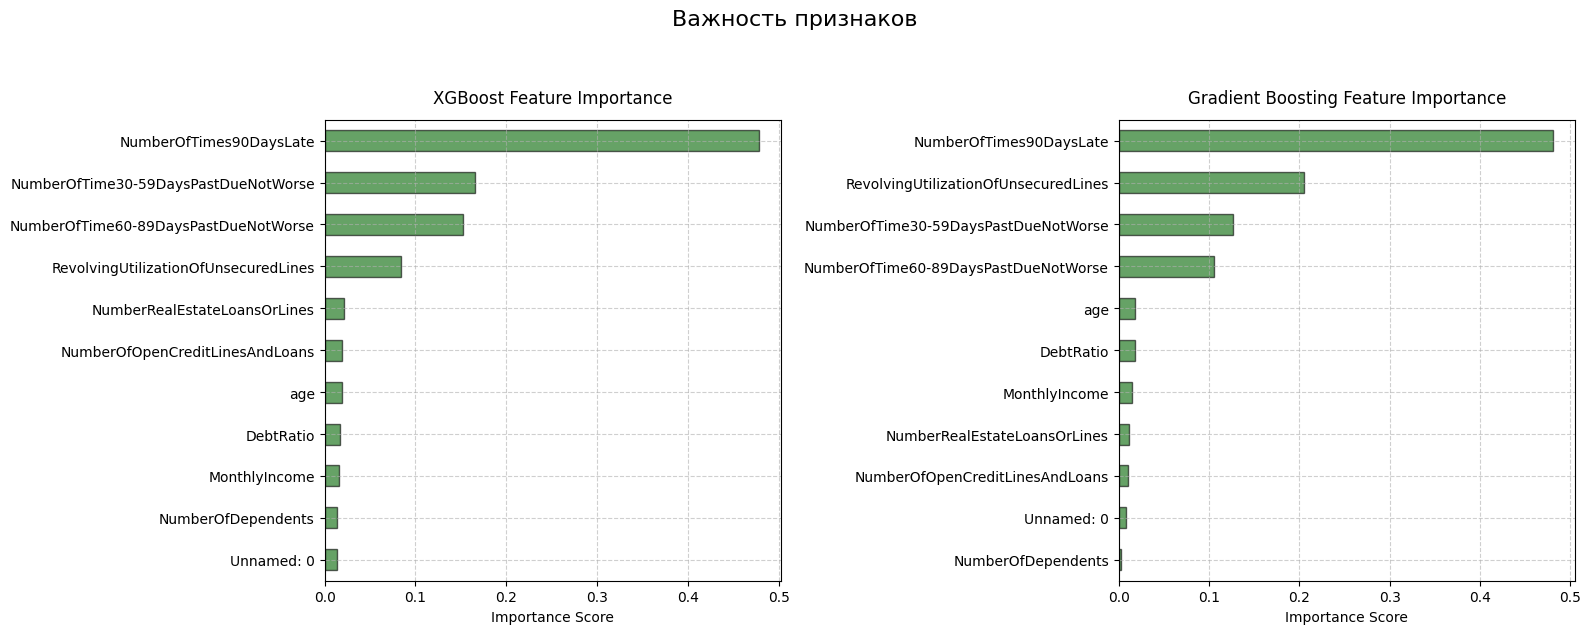

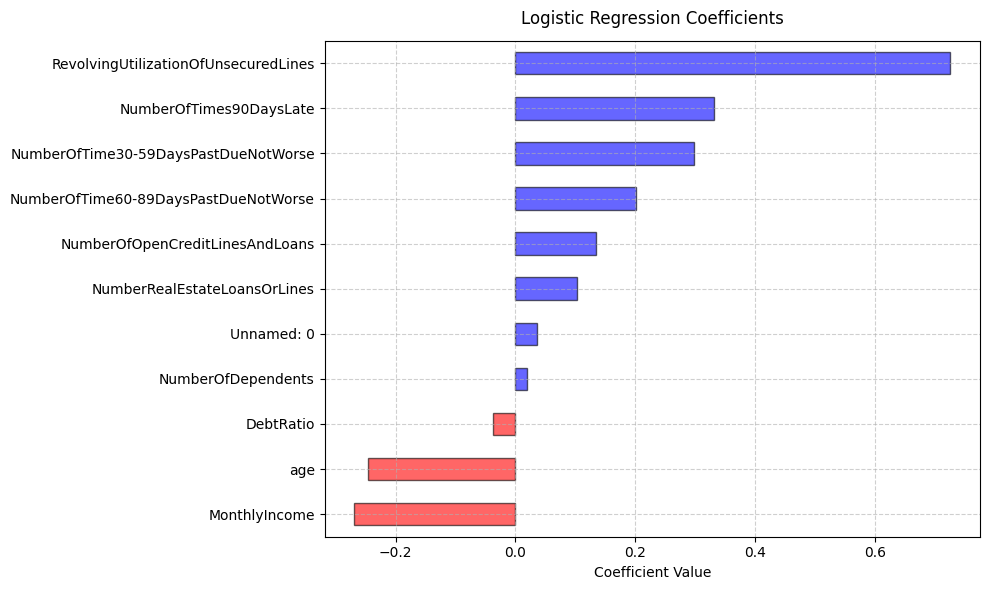

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Словарь с обученными моделями
models = {
    'XGBoost': xgb_model,
    'Gradient Boosting': gb_model,
    'Random Forest': rf_model,
    'Logistic Regression': lr
}

# Создаем фигуру для важности признаков (только для моделей с feature_importances_)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plt.suptitle("Важность признаков", y=1.05, fontsize=16)

for ax, (name, model) in zip(axes, [(name, m) for name, m in models.items() if hasattr(m, 'feature_importances_')]):
    importances = pd.Series(model.feature_importances_, index=X.columns)
    importances.sort_values().plot(
        kind='barh',
        ax=ax,
        color='darkgreen',
        alpha=0.6,
        edgecolor='black'
    )
    ax.set_title(f'{name} Feature Importance', pad=12)
    ax.set_xlabel('Importance Score')
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Для логистической регрессии (коэффициенты вместо важности признаков)
if 'Logistic Regression' in models:
    lr_coef = pd.Series(models['Logistic Regression'].coef_[0], index=X.columns)
    plt.figure(figsize=(10, 6))
    lr_coef.sort_values().plot(
        kind='barh',
        color=['red' if x < 0 else 'blue' for x in lr_coef.sort_values()],
        alpha=0.6,
        edgecolor='black'
    )
    plt.title('Logistic Regression Coefficients', pad=12)
    plt.xlabel('Coefficient Value')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()